In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")
hep.style.use(hep.style.CMS)

In [2]:
file_name = "/home/ryan/clas_analysis/data/ntuples_dc_020046_00000-00099.root"
with ur.open("%s:data"%(file_name)) as events:
    branches = events.arrays()

In [3]:
electron_cut = branches["pid"]==11
targets_A = {"Pb":208}
solid_target = "Pb"

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

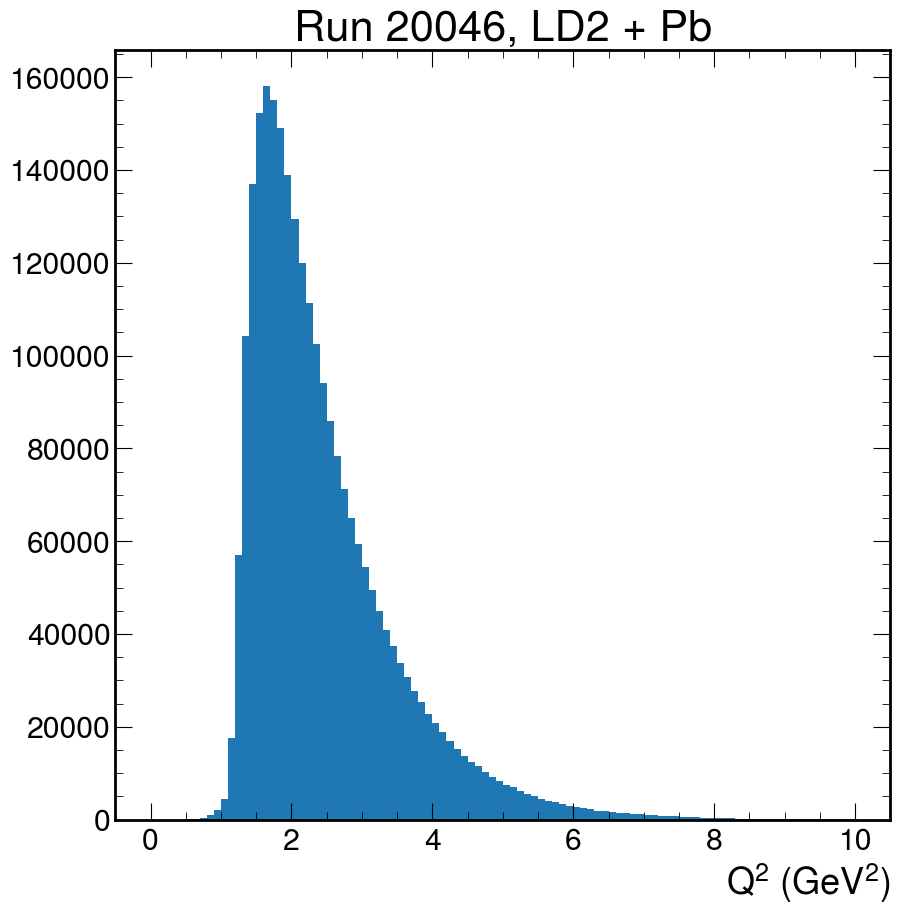

In [4]:
plt.hist(branches["Q2"][electron_cut], bins = 100, range=(0,10))
plt.xlabel("$Q^2~(GeV^2)$")
plt.title("Run 20046, LD2 + Pb")

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

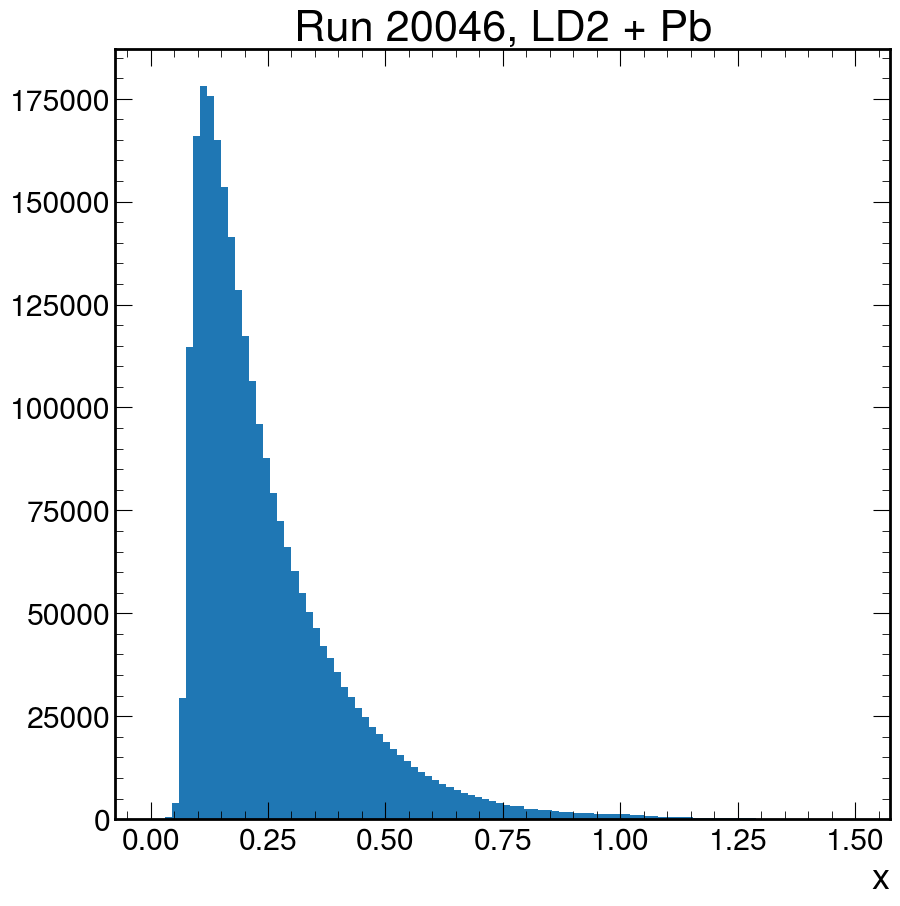

In [5]:
plt.hist(branches["x_bjorken"][electron_cut], bins = 100, range=(0,1.5))
plt.xlabel("$x$")
plt.title("Run 20046, LD2 + Pb")

Text(1, 0, 'Vertex z (cm)')

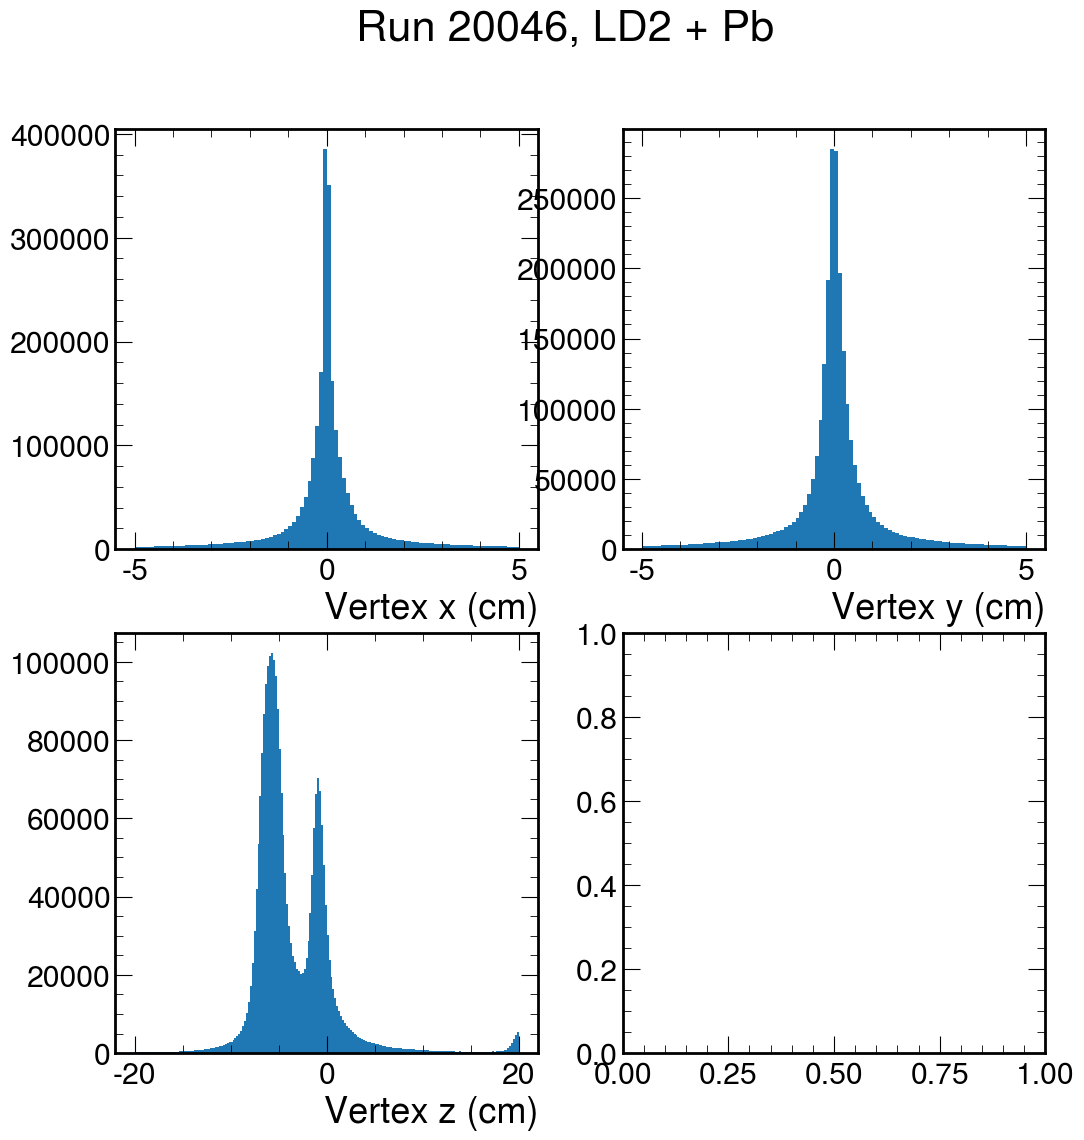

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Run 20046, LD2 + Pb")

ax1.hist(branches["v_x"][electron_cut], bins = 100, range=(-5,5))
ax1.set_xlabel("Vertex x (cm)")

ax2.hist(branches["v_y"][electron_cut], bins = 100, range=(-5,5))
ax2.set_xlabel("Vertex y (cm)")

ax3.hist(branches["v_z"][electron_cut], bins = 200, range=(-20,20))
ax3.set_xlabel("Vertex z (cm)")

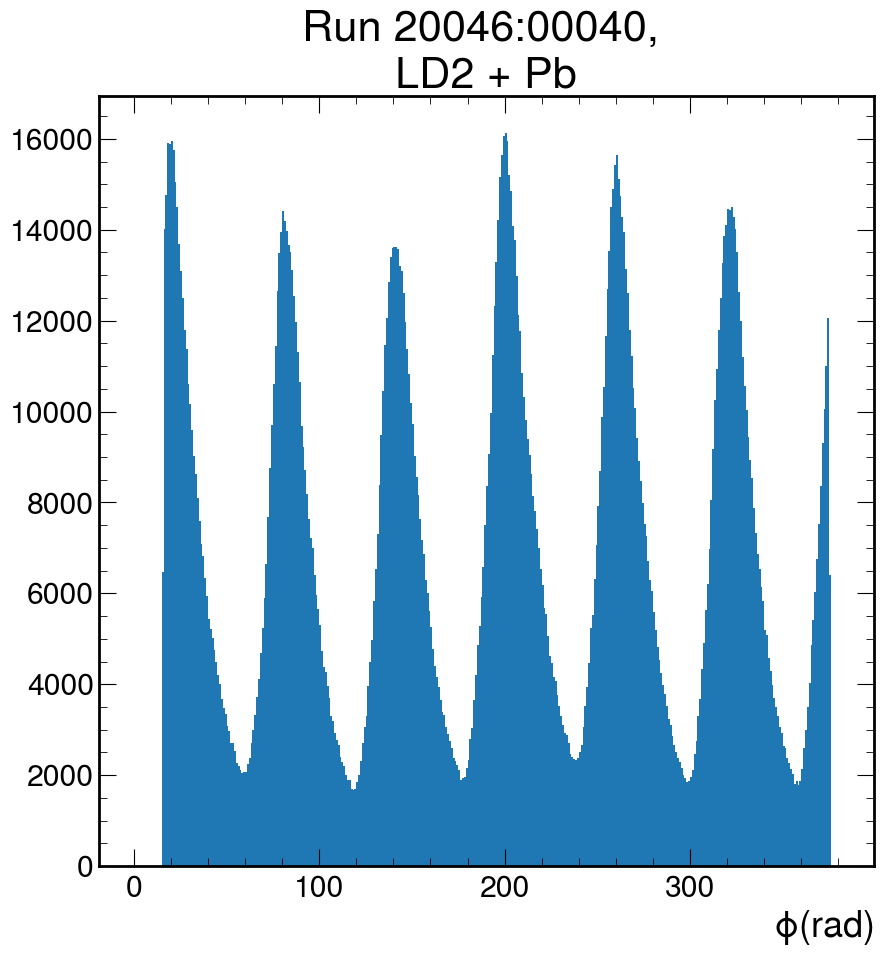

In [7]:
phi = branches["phi"][electron_cut] + np.pi
phi_degrees = phi * 180/np.pi + 15.5
plt.hist(phi_degrees, bins = 380, range=(0,380))
plt.xlabel("$\phi (rad)$")
plt.title("Run 20046:00040, \nLD2 + Pb")
sector_1_cut = (phi_degrees > 360) | (phi_degrees < 60)
sector_2_cut = (phi_degrees > 60) & (phi_degrees < 120)
sector_3_cut = (phi_degrees > 120) & (phi_degrees < 180)
sector_4_cut = (phi_degrees > 180) & (phi_degrees < 240)
sector_5_cut = (phi_degrees > 240) & (phi_degrees < 300)
sector_6_cut = (phi_degrees > 300) & (phi_degrees < 360)
sector_cuts = [sector_1_cut, sector_2_cut, sector_3_cut, sector_4_cut, sector_5_cut, sector_6_cut]
sector_titles = ["Sector 1", "Sector 2","Sector 3", "Sector 4", "Sector 5", "Sector 6"]

In [8]:
electron_vertex_z = branches["v_z"][electron_cut]

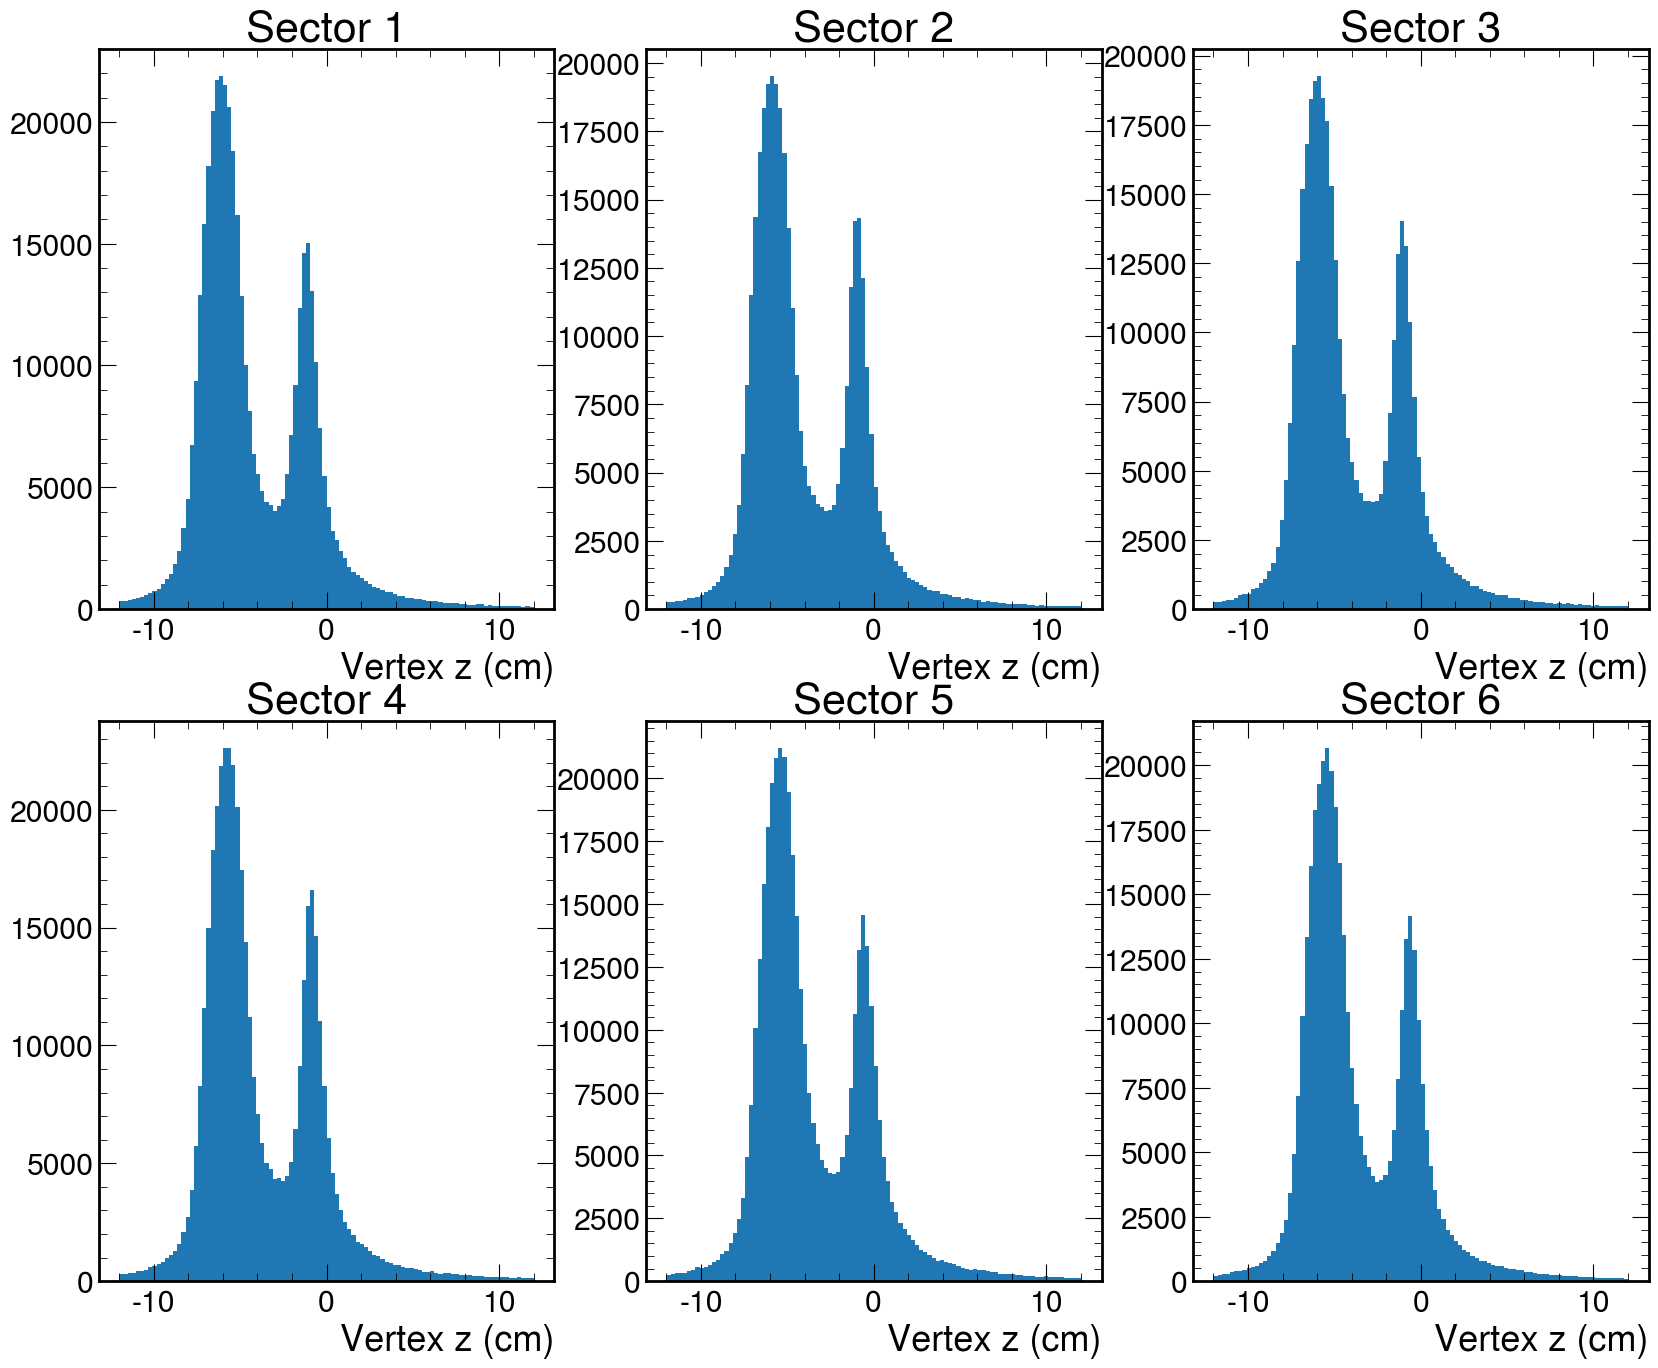

In [9]:
fig, axs = plt.subplots(2,3, figsize=(20,16))
axs = axs.ravel()
for idx,ax in enumerate(axs):
    ax.hist(electron_vertex_z[sector_cuts[idx]], bins = 100, range = (-12, 12))
    ax.set_title(sector_titles[idx])
    ax.set_xlabel("Vertex z (cm)")

In [10]:
from scipy.optimize import curve_fit
def double_gaussian(x, amp1, mean1, sigma_squared1, amp2, mean2, sigma_squared2):
    return amp1 * np.exp( -(x - mean1)**2 / (2*sigma_squared1) ) + \
           amp2 * np.exp( -(x - mean2)**2 / (2*sigma_squared2) )

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

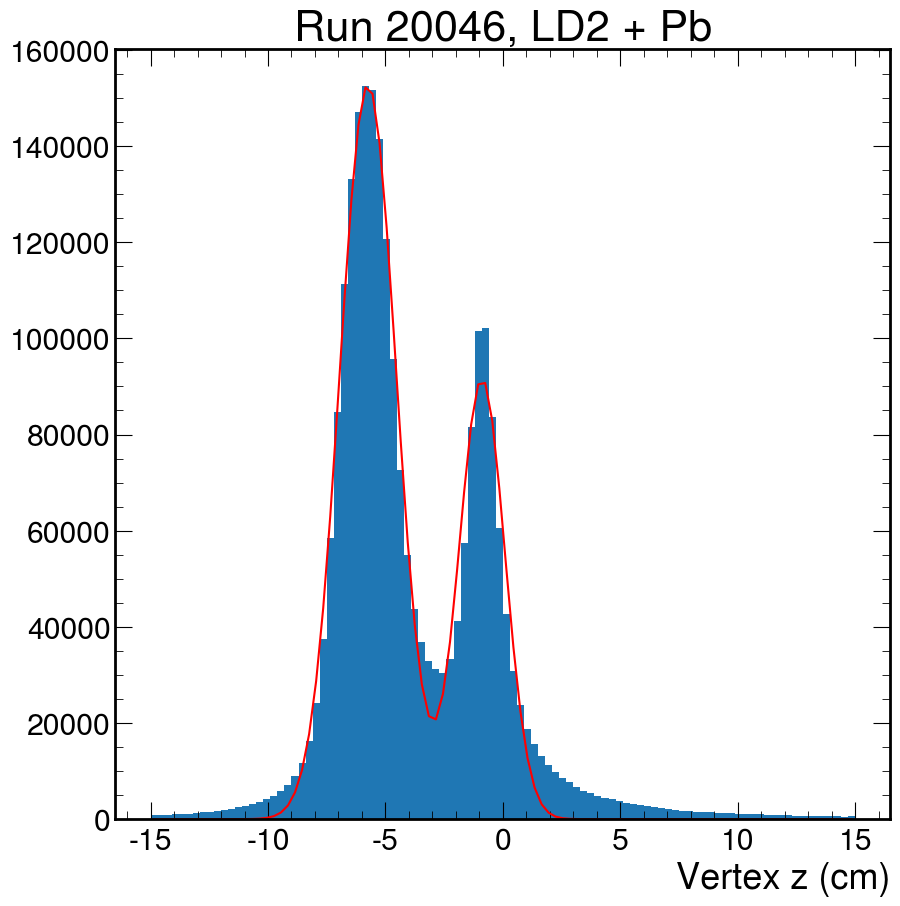

In [11]:
hist_data, bins, patches = plt.hist(electron_vertex_z, bins = 100, range=(-15, 15))

vertex_z_bins = (bins[:-1] + bins[1:])/2
vertex_z_counts = hist_data
mean_guess = ak.mean(electron_vertex_z)
std_guess = ak.std(electron_vertex_z)

fit_parameters, fit_covariance = curve_fit(double_gaussian,
                                           vertex_z_bins,
                                           vertex_z_counts, 
                                           p0=(100, mean_guess, std_guess**2, 100, mean_guess, std_guess**2))

y_fit = double_gaussian(vertex_z_bins, *fit_parameters)
plt.plot(vertex_z_bins, y_fit, color='r')

plt.xlabel("Vertex z (cm)")
plt.title("Run 20046, LD2 + {solid}".format(solid=solid_target))

Deuterium cut: -8.66 < z < -2.83
Solid cut: -2.79 < z < 1.01


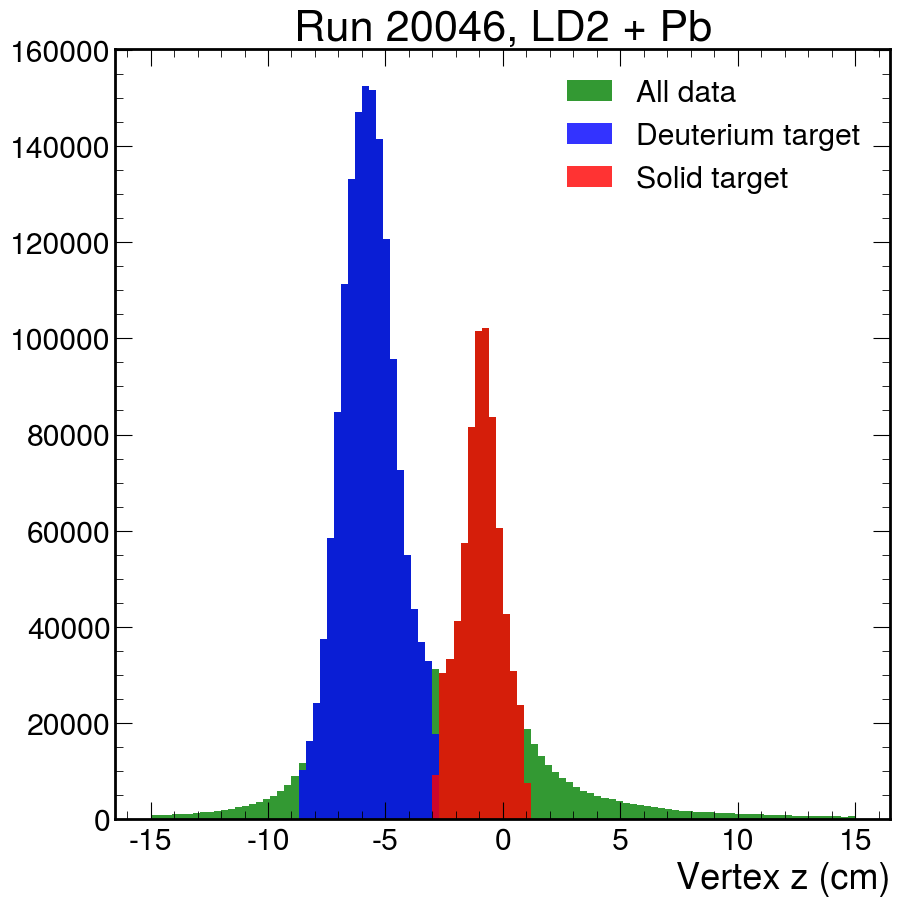

705750
1543181
2.1865830676585194


In [12]:
# Deuterium should have the more negative vertex z position
deuterium_z_mean = min(fit_parameters[1], fit_parameters[4])
if deuterium_z_mean == fit_parameters[1]:
    deuterium_z_sigma = fit_parameters[2]
    solid_z_mean, solid_z_sigma = fit_parameters[4], fit_parameters[5]
elif deuterium_z_mean == fit_parameters[4]:
    deuterium_z_sigma = fit_parameters[5]
    solid_z_mean, solid_z_sigma = fit_parameters[1], fit_parameters[2]

deuterium_cut = (electron_vertex_z > (deuterium_z_mean - 2 * deuterium_z_sigma) ) &\
                (electron_vertex_z < (deuterium_z_mean + 2 * deuterium_z_sigma) )
solid_cut     = (electron_vertex_z > (solid_z_mean - 2 * solid_z_sigma) ) &\
                (electron_vertex_z < (solid_z_mean + 2 * solid_z_sigma) )


print("Deuterium cut: {low} < z < {high}".format(low=round(deuterium_z_mean - 2 * deuterium_z_sigma, 2),
                                                 high=round(deuterium_z_mean + 2 * deuterium_z_sigma ,2)))
print("Solid cut: {low} < z < {high}".format(low=round(solid_z_mean - 2 * solid_z_sigma, 2),
                                                 high=round(solid_z_mean + 2 * solid_z_sigma, 2) ))
plt.hist(electron_vertex_z,
         bins = 100,
         range=(-15, 15),
         color='g',
         label="All data",
         alpha=.8)
plt.hist(electron_vertex_z[deuterium_cut],
         bins = 100,
         range=(-15, 15),
         color='b',
         label="Deuterium target",
         alpha=.8)
plt.hist(electron_vertex_z[solid_cut],
         bins = 100,
         range=(-15, 15),
         color='r',
         label="Solid target",
         alpha=.8)

plt.xlabel("Vertex z (cm)")
plt.title("Run 20046, LD2 + {solid}".format(solid=solid_target))
plt.legend()
plt.show()

print(len(electron_vertex_z[solid_cut]))
print(len(electron_vertex_z[deuterium_cut]))
print(len(electron_vertex_z[deuterium_cut])/len(electron_vertex_z[solid_cut]))

Text(0.5, 1.0, 'Run 20046, LD2 + Pb \n positive particles, p<10 GeV \n $0<\\beta<1.2$')

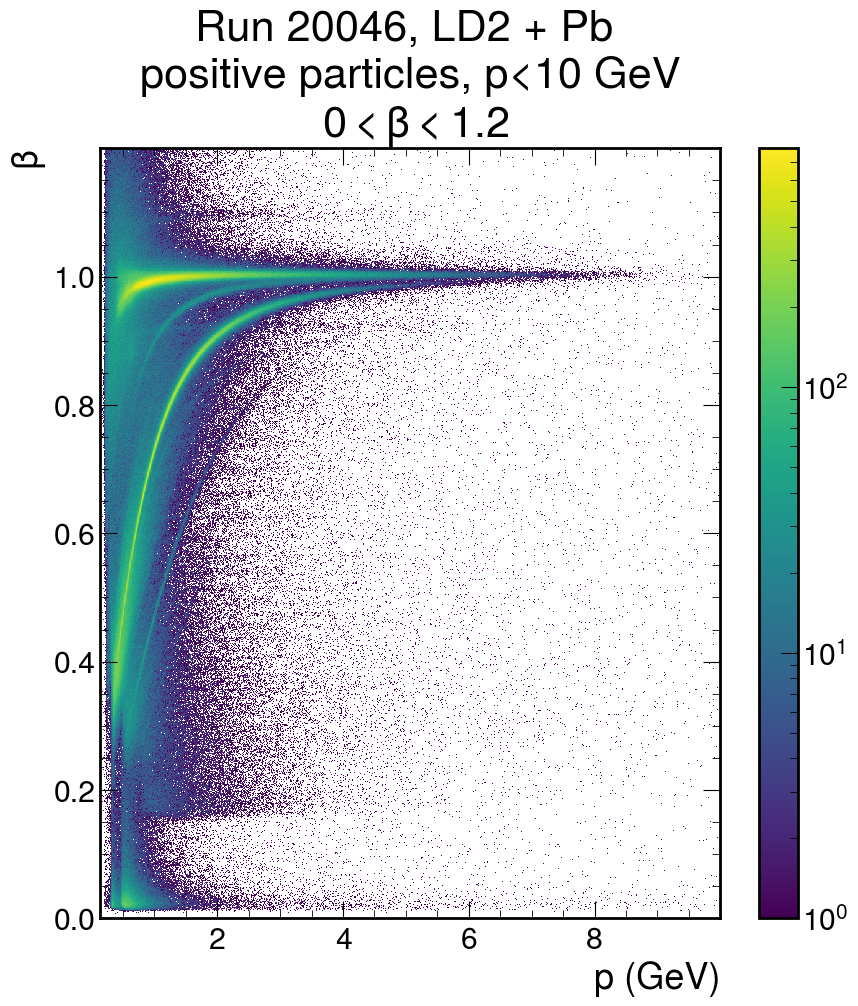

In [20]:
import matplotlib.colors as mcolors
charge_cut = branches["charge"]>0
momentum_cut = (branches["p"] < 10) 
beta_cut = (branches["beta"] > 0) & (branches["beta"] < 1.2)
cuts = charge_cut & momentum_cut & beta_cut
plt.hist2d(np.array(branches["p"][cuts]),
           np.array(branches["beta"][cuts]),
           bins=(1000, 1000),
           norm=mcolors.LogNorm())
plt.xlabel("p (GeV)")
plt.ylabel("$\\beta$")
plt.colorbar()
plt.title("Run 20046, LD2 + Pb \n positive particles, p<10 GeV \n $0<\\beta<1.2$")

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

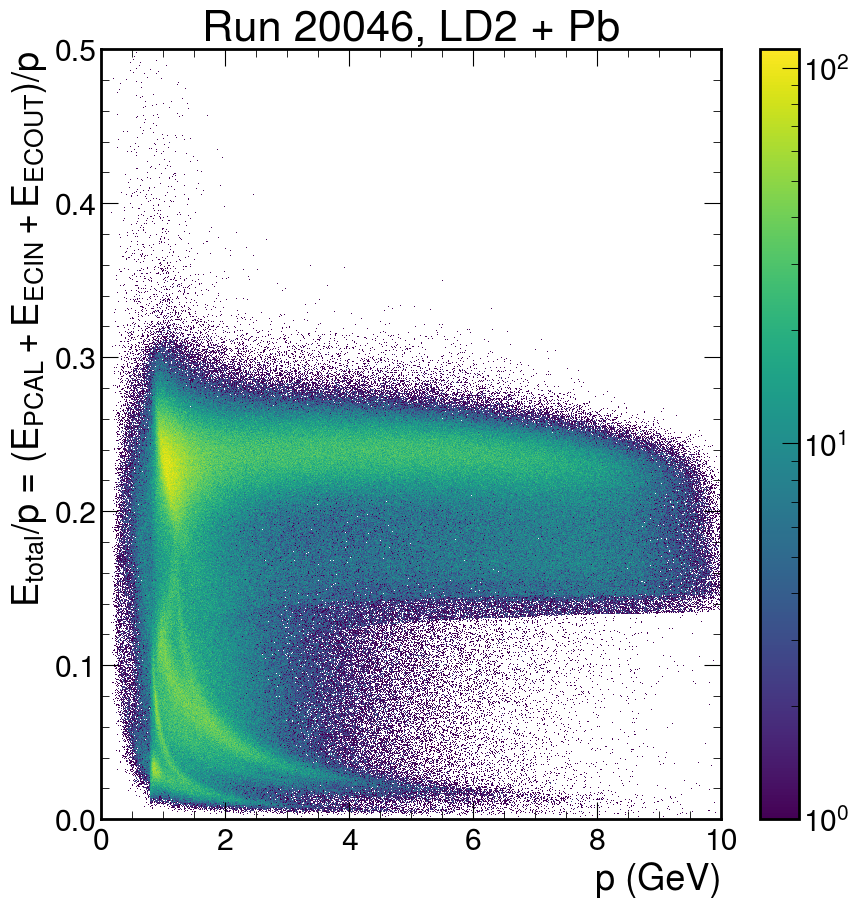

In [22]:
cut = (np.array(branches["E_total"])>0)
plt.hist2d(np.array(branches["p"][cut]),
           np.array(branches["E_total"][cut])/np.array(branches["p"][cut]),
           bins=(1000, 1000),
           range=[(0, 10),(0,0.5)],
           norm=mcolors.LogNorm())
plt.xlabel("p (GeV)")
plt.ylabel("$E_{total}$/p = $(E_{PCAL} + E_{ECIN} + E_{ECOUT})$/p")
plt.colorbar()
plt.title("Run 20046, LD2 + Pb")

Text(0.5, 1.0, 'Run 20046, LD2 + Pb')

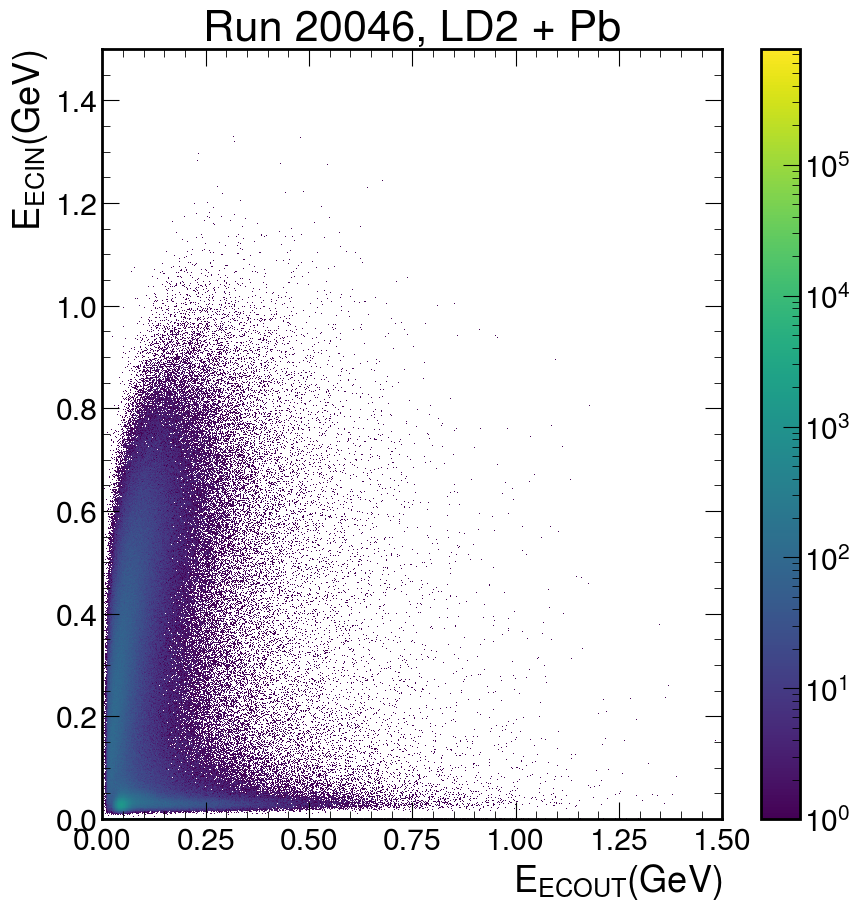

In [23]:
cut = (np.array(branches["E_total"])>0)
plt.hist2d(np.array(branches["E_ECOU"][cut]),
           np.array(branches["E_ECIN"][cut]),
           bins=(1000, 1000),
           range=[(0, 1.5),(0,1.5)],
           norm=mcolors.LogNorm())
plt.ylabel("$E_{ECIN} (GeV)$")
plt.xlabel("$E_{ECOUT} (GeV)$")
plt.colorbar()
plt.title("Run 20046, LD2 + Pb")